# Task 3 - Exploratory Data Project 

Desiree Thompson - February 20, 2023

Utilizing lesson learned to conduct a unique data exploration project using information related to my domain

### Importing libraries to be used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Loading .csv file into the DataFrame

In [2]:
df = pd.read_csv('dog_breeds.csv', index_col=0)

## Columns in Dataset

In [3]:
df.columns

Index(['Country of Origin', 'Fur Color', 'Height (in)', 'Color of Eyes',
       'Longevity (yrs)', 'Character Traits', 'Common Health Problems'],
      dtype='object')

## Decriptive statistics for Dataset

In [4]:
df.describe()

,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),Character Traits,Common Health Problems
count,117,117,117,117,117,117,117
unique,27,69,67,4,15,38,30
top,England,White,10-12,Brown,12-15,"Intelligent, energetic, playful, good-natured","Dental problems, eye issues, skin allergies"
freq,24,9,8,108,44,50,59


## Unique values contained in Dataset

In [5]:
[df[col_name].unique() for col_name in df.columns]

[array(['Canada', 'Germany', 'England', 'France', 'Mexico', 'Scotland',
        'China', 'Russia', 'Australia', 'Switzerland', 'Ireland',
        'Belgium', 'Rhodesia', 'United States', 'Madagascar', 'Italy',
        'Wales', 'Middle East', 'Finland', 'Japan', 'Netherlands',
        'Hungary', 'Tibet', 'Malta', 'Turkey', 'Africa', 'Congo'],
       dtype=object),
 array(['Yellow, Black, Chocolate', 'Black, Tan', 'White, Red',
        'White, Black, Brown, Apricot', 'White, Tan, Red, Lemon',
        'Black, Brown, Tan, White', 'Fawn, Brindle', 'Golden',
        'Fawn, Black', 'Black, White', 'Black, White, Brown', 'White',
        'Black, Red', 'Black, Brown', 'White, Black, Brindle',
        'Orange, Sable, Black', 'Black, Blue, Fawn, Harlequin',
        'Apricot, Fawn', 'Black, Brown, Grey', 'Red, White', 'Blue, Grey',
        'Grey, Red, Black', 'Black, White, Brindle', 'Cream, Fawn',
        'Silver, Grey', 'Fawn, Mahogany', 'Light Wheaten',
        'Black, White, Liver', 'Red', 'Whi

## Creating Word Cloud (OPTIONAL BONUS)

In [6]:
df[['Character Traits']].head()

,Character Traits
Breed,
Labrador Retriever,"Loyal, friendly, intelligent, energetic, good-..."
German Shepherd,"Loyal, intelligent, protective, confident, tra..."
Bulldog,"Loyal, calm, gentle, brave"
Poodle,"Intelligent, active, affectionate, hypoallergenic"
Beagle,"Curious, friendly, energetic, good-natured"


Created a string to store all the words from the Character Traits column in a single line of text

In [7]:
text = ' '.join(review for review in df['Character Traits'].astype(str))

Printing the number of words that are in the text list that you just created from the Pandas column

In [8]:
print('There are {} words in the combination of all cells in the column Character Traits'.format(len(text)))

There are 5316 words in the combination of all cells in the column Character Traits


Filtering out commonly used word in the English language

In [9]:
stopwords = set(STOPWORDS)

Generating WorldCloud image

In [10]:
wordcloud = WordCloud(max_words= 1000, background_color='white').generate(text)

Display WordCloud

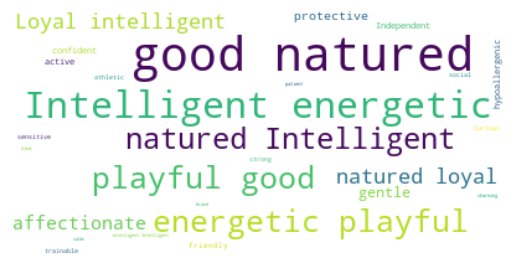

In [11]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Adjusting "Longevity (yrs)" Information

Deconcatenate from "Longevity (yrs)" and established a "Longevity (max)" column in order to isolate the maximum age range for each breed

In [12]:
df['Longevity (max)'] = df['Longevity (yrs)'].str.replace(r'\d+-','')

C:\Users\Desiree\AppData\Local\Temp\ipykernel_23688\2873940122.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Longevity (max)'] = df['Longevity (yrs)'].str.replace(r'\d+-','')


Changed the "Longevity (max)" column to a numeric column

In [13]:
df[['Longevity (max)']] = df[['Longevity (max)']].apply(pd.to_numeric)

Sorted the values in descending order

In [14]:
df = df.sort_values(['Longevity (max)'], ascending=[False])

Filtered by "Longevity (max)" to show only the values greater than 12

In [15]:
greater_than = df[df['Longevity (max)'] > 12]

Sample of data 

In [16]:
greater_than.head()

,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),Character Traits,Common Health Problems,Longevity (max)
Breed,,,,,,,,
Chihuahua,Mexico,"Black, Brown, Tan, White",6-9,"Brown, Blue",12-20,"Loyal, energetic, confident, sensitive","Dental problems, eye issues, respiratory issues",20
Chinese Crested,China,"Pink, White, Black",11-13,Brown,13-18,"Intelligent, energetic, affectionate, good-nat...","Dental problems, eye problems, skin allergies",18
Pomeranian,Germany,"Orange, Sable, Black",6-7,Brown,12-16,"Playful, energetic, intelligent, good-natured","Dental problems, eye problems, obesity",16
Border Terrier,England,"Red, Wheaten, Black",10-16,Brown,12-16,"Intelligent, energetic, playful, good-natured","Dental problems, skin allergies, hip dysplasia",16
Papillon,France,"White, Black, Sable, Red",8-11,Brown,14-16,"Intelligent, energetic, affectionate, good-nat...","Dental problems, eye problems, bladder stones",16


## Data Visualisation

Number of breeds that originated in each country

<AxesSubplot: >

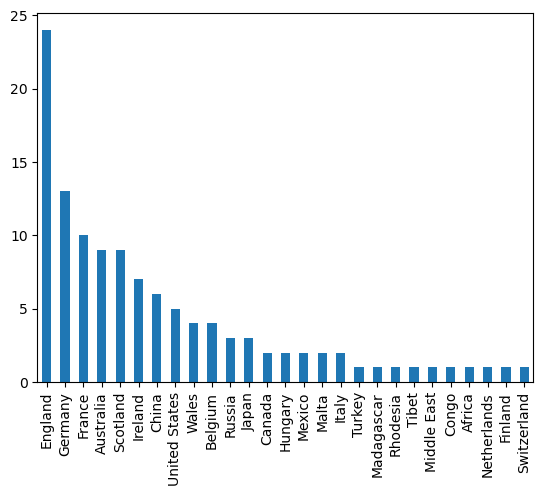

In [17]:
df['Country of Origin'].value_counts().plot(kind='bar')

## Filtering based on 'Country of Origin'

In [18]:
english_dogs = df[df['Country of Origin'] == 'England']

In [19]:
english_dogs.describe()

,Longevity (max)
count,24.000000
mean,13.708333
std,1.654484
min,10.000000
25%,12.000000
50%,14.000000
75%,15.000000
max,16.000000


In [20]:
english_dogs

,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),Character Traits,Common Health Problems,Longevity (max)
Breed,,,,,,,,
Border Terrier,England,"Red, Wheaten, Black",10-16,Brown,12-16,"Intelligent, energetic, playful, good-natured","Dental problems, skin allergies, hip dysplasia",16
Jack Russell Terrier,England,"White, Black & Tan",10-12,Brown,12-15,"Intelligent, energetic, playful, good-natured","Dental problems, eye issues, skin allergies",15
Border Collie,England,"Black, White, Red",18-22,Brown,12-15,"Intelligent, energetic, playful, good-natured","Dental problems, eye issues, skin allergies",15
Pointer,England,"Black, White, Liver",21-27,Brown,12-15,"Intelligent, energetic, good-natured, affectio...","Hip dysplasia, eye problems, cancer",15
English Setter,England,"Black, White, Liver",23-27,Brown,12-15,"Intelligent, energetic, affectionate, good-nat...","Hip dysplasia, eye problems, cancer",15
Beagle,England,"White, Tan, Red, Lemon",13-15,Brown,12-15,"Curious, friendly, energetic, good-natured","Ear infections, hip dysplasia, epilepsy",15
Cocker Spaniel,England,"Black, Brown",14-15,Brown,12-15,"Intelligent, energetic, playful, good-natured","Dental problems, eye issues, skin allergies",15
Cocker Spaniel,England,"Black, Brown",14-15,Brown,12-15,"Affectionate, intelligent, energetic, good-nat...","Ear infections, hip dysplasia, eye problems",15
Whippet,England,"White, Black, Red",18-22,Brown,12-15,"Intelligent, energetic, good-natured, loyal","Dental problems, eye issues, skin allergies",15


## Calculating a Correlation Matrix with Pandas

Deconcatenate from "Height (in)" and established a "Height (max)" column in order to isolate the maximum height range for each breed

In [21]:
df['Height (max)'] = df['Height (in)'].str.replace(r'\d+-','')

C:\Users\Desiree\AppData\Local\Temp\ipykernel_23688\2727542898.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Height (max)'] = df['Height (in)'].str.replace(r'\d+-','')


Changed 'Height (max) to a numeric column

In [22]:
df[['Height (max)']] = df[['Height (max)']].apply(pd.to_numeric)

Filtered out all the nonnumeric columns

In [23]:
df = df[['Longevity (max)', 'Height (max)']]

Reviewed correlation between numeric columns

In [24]:
df.corr()

,Longevity (max),Height (max)
Longevity (max),1.000000,-0.648583
Height (max),-0.648583,1.000000


Seaborn Correlation Heatmap

In [25]:
plt.figure(figsize=(4,4))

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<AxesSubplot: >

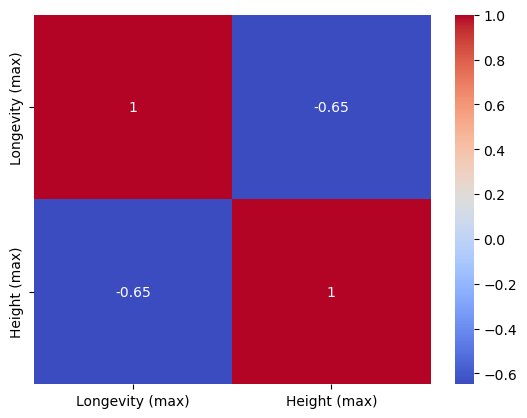

In [26]:
seaborn.heatmap(df.corr(), annot=True, cmap='coolwarm')